In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('finance_movies.csv')
df = (df.loc[:, ['movie', 'year', 'description', 'rating', 'duration', 'script']])
df

,movie,year,description,rating,duration,script
0,Margin Call,2011,Set in the early stages of the 2008 financial ...,7.1,107,Is that them? Jesus Christ. Are they going to ...
1,Wall Street,1987,This is the classic film that started it all. ...,7.3,126,Easy! Excuse me! Good morning. Jackson Steinem...
2,The Big Short,2015,"Based on the book by Michael Lewis, The Big Sh...",7.8,130,"Frank. How are the wife and kids? You know, fo..."
3,Trading Places,1983,"Being the only pure comedy on this list, Tradi...",7.5,118,"Your breakfast, sir. Pork bellies! I have a hu..."
4,The Wolf of Wall Street,2013,"Directed by Martin Scorsese, The Wolf of Wall ...",8.2,180,The world of investing can be a jungle. Bulls....
5,American Psycho,2000,American Psycho is a cult classic in Wall Stre...,7.6,104,rare roasted partridge breast in raspberry cou...
6,Arbitrage,2012,Arbitrage is a 2012 film that tells the story ...,6.6,107,But you took a huge bet on the housing crisis ...
7,Equity,2016,Equity follows the story of Naomi Bishop (Anna...,5.6,100,The entire market is watching? Back with Dynac...
8,Inside Job,2010,Though this movie is technically a documentary...,8.2,108,Iceland is a stable democracy with a high stan...
9,Boiler Room,2000,Boiler Room tells the story of Seth Davis (Gio...,7.0,120,I read this article a while back that said Mic...


In [14]:
df.memory_usage(deep=True)

Index             128
movie             959
year              104
description     12804
rating            104
duration          104
script         993022
dtype: int64

In [15]:
# Check size of data types
np.finfo(np.float16)

# np.iinfo(np.int8)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [16]:
(df
 .astype({'year': 'int16', 'duration': 'int16', 'rating': 'float16'})
 .dtypes
)

movie           object
year             int16
description     object
rating         float16
duration         int16
script          object
dtype: object

In [ ]:
## ADVANCED

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Sort the m_title and rate in descending order based on the rate
m_title, rate = zip(*sorted(zip(df.movie, df.rating), key=lambda x: x[1], reverse=False))

# Set the font for the tick labels and the text on the bars
font_path = 'graphfonts/Roboto/RobotoCondensed-Light.ttf'  # Replace with the path to the Roboto font file
font_prop = fm.FontProperties(fname=font_path)
font = {'family': 'sans-serif', 'size': 10, 'fontproperties': font_prop}

# Set the font for the title
title_font_path = 'graphfonts/Roboto/RobotoCondensed-Bold.ttf'  # Replace with the path to the Fira font file
title_font_prop = fm.FontProperties(fname=title_font_path, size=14)

# Set the figure size and DPI
plt.figure(figsize=(8, 6), dpi=400)

# Create the horizontal bar plot
plt.barh(m_title, rate)

# Add the values on the right side of each bar
for i, v in enumerate(rate):
    plt.text(v + 0.1, i, str(v), va='center', fontdict=font, color='red')

# Set the title and labels
plt.title('IMDB movie rating', y=.955, fontproperties=title_font_prop)
# plt.xlabel('rate')
# plt.ylabel('movie')

# Set the font for the tick labels
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Remove the spines
plt.gca().spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# Hide the y-axis
# plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# Display the plot
plt.show()


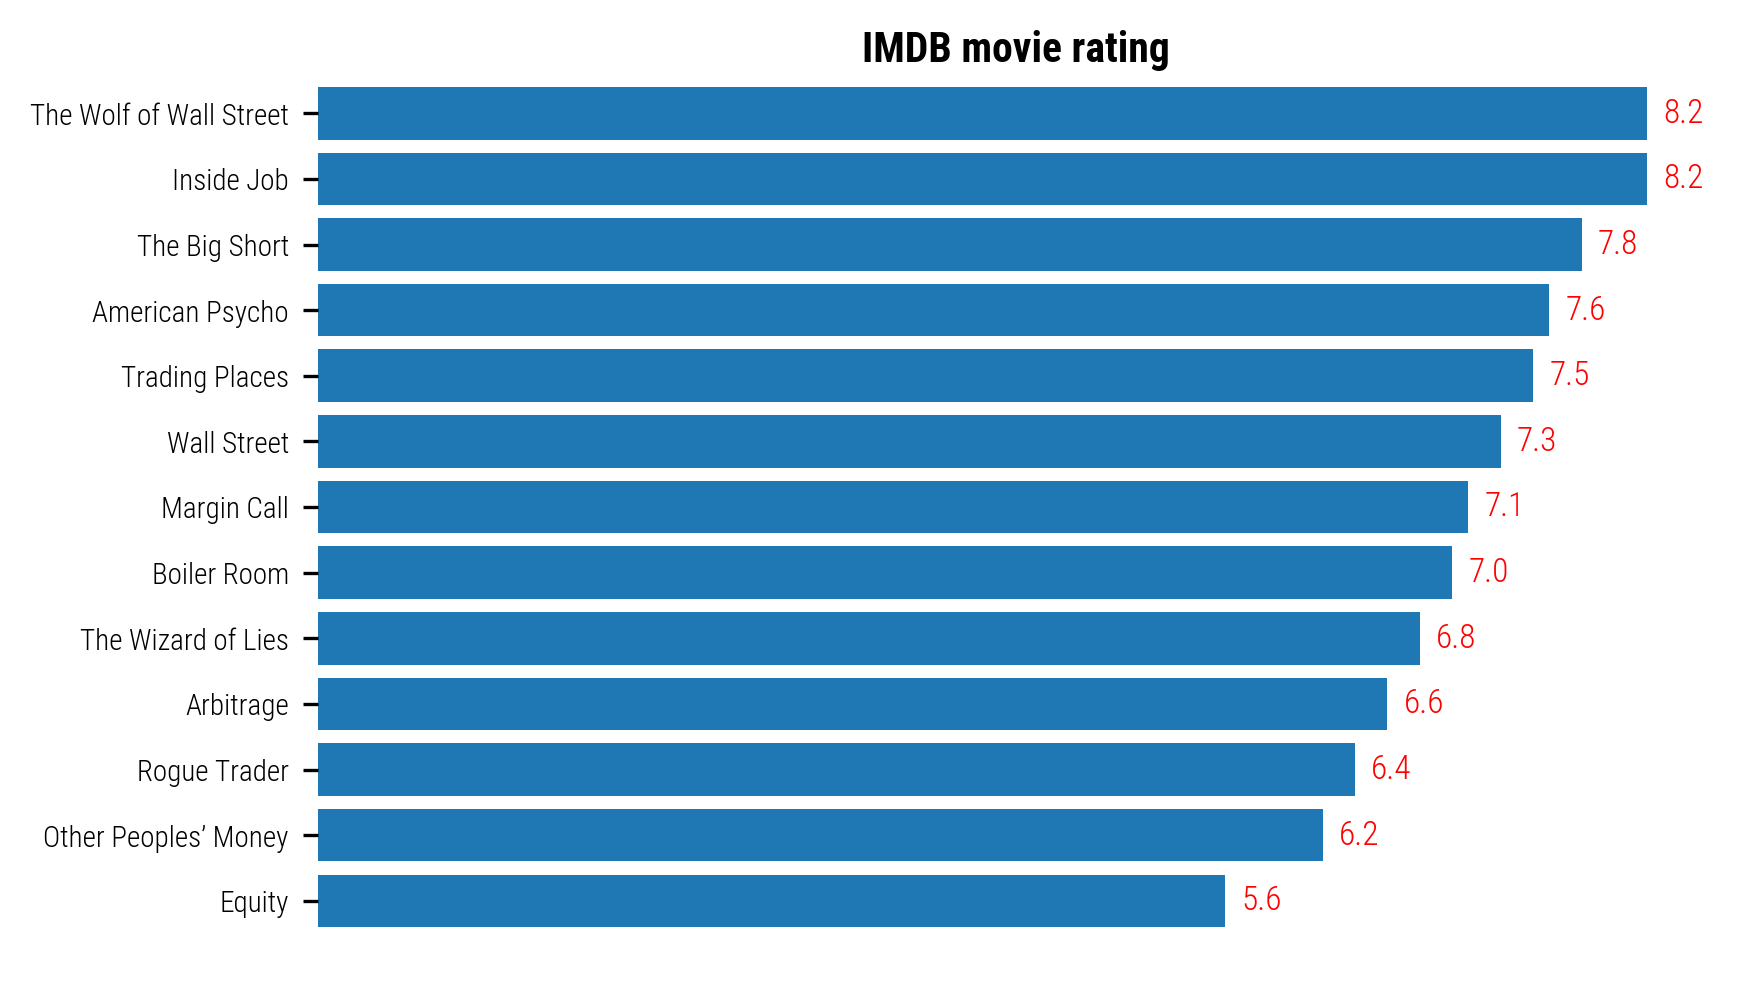

In [17]:
## SIMPLE

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Sort the m_title and rate in descending order based on the rate
sorted_movies = sorted(zip(df.rating, df.movie), reverse=False)
rate, m_title = zip(*sorted_movies)

# Set the font for the tick labels and the text on the bars
font_path = 'graphfonts/Roboto/RobotoCondensed-Light.ttf' # Replace with the path to the Roboto font file
font_prop = fm.FontProperties(fname=font_path)
font = {'family': 'sans-serif', 'size': 8, 'fontproperties': font_prop}

# Set the font for the title
title_font_path = 'graphfonts/Roboto/RobotoCondensed-Bold.ttf' # Replace with the path to the Fira font file
title_font_prop = fm.FontProperties(fname=title_font_path, size=10)

#Set the figure size and DPI
plt.figure(figsize=(6, 4), dpi=300)

# Create the horizontal bar plot
plt.barh(m_title, rate)

# Add the values on the right side of each bar
for i, v in enumerate(rate):
    plt.text(v + 0.1, i, str(v), va='center', fontdict=font, color='red')

# Set the title and labels
plt.title('IMDB movie rating', y=.955, fontproperties=title_font_prop)

# plt.xlabel('rate')
# plt.ylabel('movie')

#Set the font for the tick labels
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop, fontsize=7, rotation=0)

# Remove the spines
plt.gca().spines[['right', 'top', 'left', 'bottom']].set_visible(False)

#Hide the y-axis
plt.gca().axes.get_xaxis().set_visible(False)

#Display the plot
plt.show()

## Next
Add new columns that count the number of words in script and other columns that count the occurence of words in script.

In [51]:
import re

df = (df.assign(script_len=df['script'].apply(lambda df_: len(str(df_).split()))))

# define the list of keywords to search for
keywords = ['shit', 'fuck', 'bitch', 'cunt', 'asshole']

# iterate over the keywords and count the occurrences in the 'description' column
for keyword in keywords:
    # construct a regular expression pattern that matches any word containing the keyword as a substring
    pattern = re.compile(rf'\b\w*{keyword}\w*\b')
    
    # apply the regular expression to each description and count the matches
    matches = df['script'].str.findall(pattern)
    counts = matches.apply(len)
    
    # add a new column with the keyword as the prefix
    df[f'{keyword}_count'] = counts
    
# print the resulting DataFrame
display(df)

,movie,year,description,rating,duration,script,script_len,shit_count,fuck_count,bitch_count,cunt_count,asshole_count
0,Margin Call,2011,Set in the early stages of the 2008 financial ...,7.1,107,Is that them? Jesus Christ. Are they going to ...,8929,6,45,0,1,0
1,Wall Street,1987,This is the classic film that started it all. ...,7.3,126,Easy! Excuse me! Good morning. Jackson Steinem...,13106,8,15,5,0,3
2,The Big Short,2015,"Based on the book by Michael Lewis, The Big Sh...",7.8,130,"Frank. How are the wife and kids? You know, fo...",15301,42,65,2,0,4
3,Trading Places,1983,"Being the only pure comedy on this list, Tradi...",7.5,118,"Your breakfast, sir. Pork bellies! I have a hu...",8416,7,11,4,0,2
4,The Wolf of Wall Street,2013,"Directed by Martin Scorsese, The Wolf of Wall ...",8.2,180,The world of investing can be a jungle. Bulls....,23642,85,498,8,2,6
5,American Psycho,2000,American Psycho is a cult classic in Wall Stre...,7.6,104,rare roasted partridge breast in raspberry cou...,8079,3,24,5,0,3
6,Arbitrage,2012,Arbitrage is a 2012 film that tells the story ...,6.6,107,But you took a huge bet on the housing crisis ...,10975,6,67,1,0,1
7,Equity,2016,Equity follows the story of Naomi Bishop (Anna...,5.6,100,The entire market is watching? Back with Dynac...,8287,8,33,0,0,0
8,Inside Job,2010,Though this movie is technically a documentary...,8.2,108,Iceland is a stable democracy with a high stan...,12900,5,0,0,0,0
9,Boiler Room,2000,Boiler Room tells the story of Seth Davis (Gio...,7.0,120,I read this article a while back that said Mic...,15048,39,106,4,0,1


In [52]:
# define the list of finance_terms to search for
finance_terms = ['stock', 'bonds', 'mortgage', 'capital', 'premium']

# iterate over the finance_terms and count the occurrences in the 'description' column
for finance_term in finance_terms:
    # construct a regular expression pattern that matches any word containing the finance_term as a substring
    pattern = re.compile(rf'\b\w*{finance_term}\w*\b')
    
    # apply the regular expression to each description and count the matches
    matches = df['script'].str.findall(pattern)
    counts = matches.apply(len)
    
    # add a new column with the finance_term as the prefix
    df[f'{finance_term}_count'] = counts
    
# print the resulting DataFrame
display(df)

,movie,year,description,rating,duration,script,script_len,shit_count,fuck_count,bitch_count,cunt_count,asshole_count,stock_count,bonds_count,mortgage_count,capital_count,premium_count
0,Margin Call,2011,Set in the early stages of the 2008 financial ...,7.1,107,Is that them? Jesus Christ. Are they going to ...,8929,6,45,0,1,0,0,0,2,2,0
1,Wall Street,1987,This is the classic film that started it all. ...,7.3,126,Easy! Excuse me! Good morning. Jackson Steinem...,13106,8,15,5,0,3,33,1,2,2,0
2,The Big Short,2015,"Based on the book by Michael Lewis, The Big Sh...",7.8,130,"Frank. How are the wife and kids? You know, fo...",15301,42,65,2,0,4,11,51,66,5,5
3,Trading Places,1983,"Being the only pure comedy on this list, Tradi...",7.5,118,"Your breakfast, sir. Pork bellies! I have a hu...",8416,7,11,4,0,2,0,0,0,1,0
4,The Wolf of Wall Street,2013,"Directed by Martin Scorsese, The Wolf of Wall ...",8.2,180,The world of investing can be a jungle. Bulls....,23642,85,498,8,2,6,40,0,3,1,0
5,American Psycho,2000,American Psycho is a cult classic in Wall Stre...,7.6,104,rare roasted partridge breast in raspberry cou...,8079,3,24,5,0,3,0,0,0,0,0
6,Arbitrage,2012,Arbitrage is a 2012 film that tells the story ...,6.6,107,But you took a huge bet on the housing crisis ...,10975,6,67,1,0,1,1,0,0,2,0
7,Equity,2016,Equity follows the story of Naomi Bishop (Anna...,5.6,100,The entire market is watching? Back with Dynac...,8287,8,33,0,0,0,6,0,0,2,0
8,Inside Job,2010,Though this movie is technically a documentary...,8.2,108,Iceland is a stable democracy with a high stan...,12900,5,0,0,0,0,8,0,25,6,1
9,Boiler Room,2000,Boiler Room tells the story of Seth Davis (Gio...,7.0,120,I read this article a while back that said Mic...,15048,39,106,4,0,1,40,0,0,2,0


In [ ]:
import pandas as pd
import re

# create a sample DataFrame
df = pd.DataFrame({'movie': ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5'],
                   'description': ['A thrilling action movie', 'A romantic comedy', 
                                   'A suspenseful thriller romanticize', 'A psychological thriller',
                                   'A comedy with a twist']})

# define the list of keywords to search for
keywords = ['thriller', 'romantic', 'comedy']

# iterate over the keywords and count the occurrences in the 'description' column
for keyword in keywords:
    # construct a regular expression pattern that matches any word containing the keyword as a substring
    pattern = re.compile(rf'\b\w*{keyword}\w*\b')
    
    # apply the regular expression to each description and count the matches
    matches = df['description'].str.findall(pattern)
    counts = matches.apply(len)
    
    # add a new column with the keyword as the prefix
    df[f'{keyword}_count'] = counts
    
# print the resulting DataFrame
display(df)

In [ ]:
# THIS WORKS

import pandas as pd
import re

# create a sample DataFrame
df = pd.DataFrame({'movie': ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5'],
                   'description': ['A thrilling action movie', 'A romantic comedy', 
                                   'A suspenseful thriller romanticize', 'A psychological thriller',
                                   'A comedy with a twist']})

# define the list of keywords to search for
keywords = ['thriller', 'romantic', 'comedy']

# iterate over the keywords and count the occurrences in the 'description' column
for keyword in keywords:
    # construct a regular expression pattern that matches any word containing the keyword as a substring
    pattern = re.compile(rf'\b\w*{keyword}\w*\b')
    
    # apply the regular expression to each description and count the matches
    matches = df['description'].str.findall(pattern)
    counts = matches.apply(len)
    
    # add a new column with the keyword as the prefix
    df[f'{keyword}_count'] = counts
    
# print the resulting DataFrame
display(df)


## Word lists to consider
- financial words
- curse words
- drug words

In [47]:
%%timeit
import pandas as pd

# Create a sample dataframe
dd = pd.DataFrame({
    'movie': ['Title 1', 'Title 2', 'Title 3', 'Title 4', 'Title 5'],
    'description': ['This is the description of Title 1.',
                    'Title 2 has a description as well.',
                    'Description for Title 3.',
                    'Description for Title 4, which is quite long and detailed.',
                    'The description of Title 5 is short.']
})

# Use method chaining to create a new "length" column in a single line
dd = dd.assign(length = dd['description'].apply(lambda x: len(str(x).split())))

# Print the updated dataframe
# display(dd)


1.41 ms ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [48]:
%%timeit
import pandas as pd

# Create a sample dataframe
ff = pd.DataFrame({
    'movie': ['Title 1', 'Title 2', 'Title 3', 'Title 4', 'Title 5'],
    'description': ['This is the description of Title 1.',
                    'Title 2 has a description as well.',
                    'Description for Title 3.',
                    'Description for Title 4, which is quite long and detailed.',
                    'The description of Title 5 is short.']
})

# Calculate the length of each description using string manipulation
ff['length'] = ff['description'].str.count(' ') + 1

# Print the updated dataframe
# display(ff)


1.57 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
